In [1]:
#Import all necessary library
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
# Read the .edf file from the folder
sample_data_folder = r"C:\Users\user\Desktop\Winter data\19122019_1"
sample_data_raw_file = os.path.join(sample_data_folder,
                                    '19122019_1_2019.12.19_09.41.07.edf')


raw = mne.io.read_raw_edf(sample_data_raw_file, preload=True)


Extracting EDF parameters from C:\Users\user\Desktop\Winter data\19122019_1\19122019_1_2019.12.19_09.41.07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 361215  =      0.000 ...  1410.996 secs...


In [3]:
raw_temp=raw.copy() # copy the raw data for ICA implimentation
#Delete the channel that are not related to eeg signal
raw_temp.drop_channels(['COUNTER','INTERPOLATED','RAW_CQ','GYROX','GYROY','MARKER','MARKER_HARDWARE',
                       'SYNC','TIME_STAMP_s','TIME_STAMP_ms','CQ_AF3','CQ_F7','CQ_F3','CQ_FC5',
                        'CQ_T7','CQ_P7','CQ_O1','CQ_O2','CQ_P8','CQ_T8','CQ_FC6',
                        'CQ_F4','CQ_F8','CQ_AF4','CQ_CMS','CQ_DRL'])

<RawEDF  |  19122019_1_2019.12.19_09.41.07.edf, n_channels x n_times : 14 x 361216 (1411.0 sec), ~38.6 MB, data loaded>

In [4]:
# check the filtered channel
raw_temp.info["ch_names"]

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [5]:
print(raw_temp.info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : list | 14 items (EEG: 14)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2019-12-19 09:41:07 GMT
    nchan : int | 14
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
 

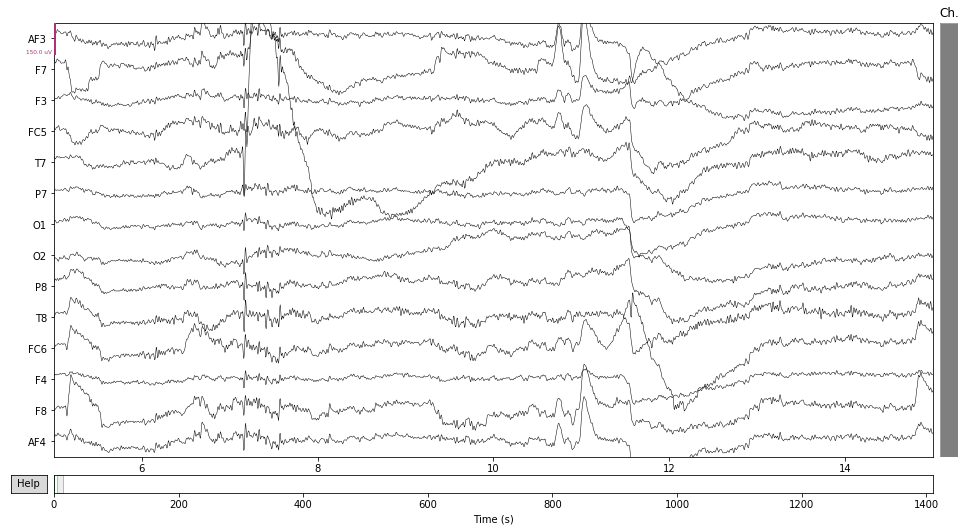

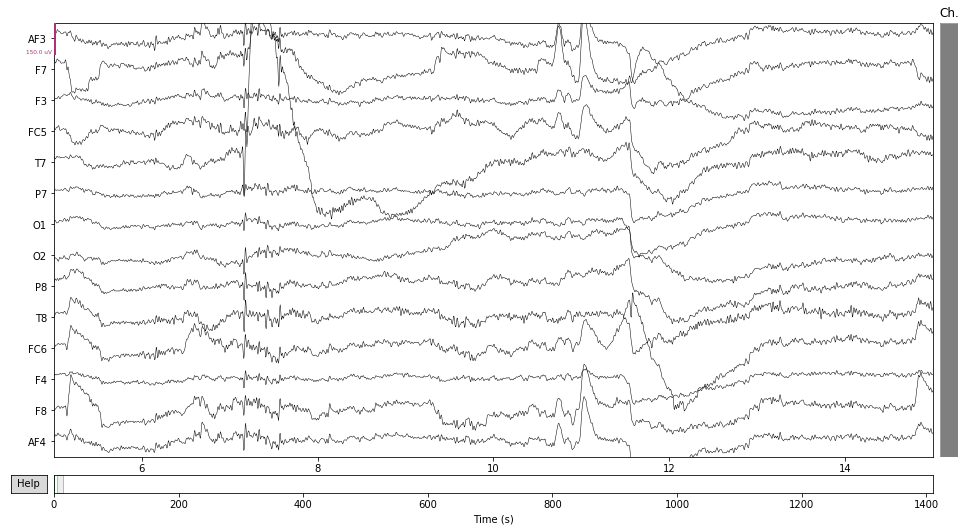

In [8]:
raw_temp.plot(start=5., duration=10,scalings={"eeg": 75e-6})

In [ ]:
#raw_temp.plot_psd(area_mode='range', tmax=10.0,  average=False)

Effective window size : 8.000 (s)


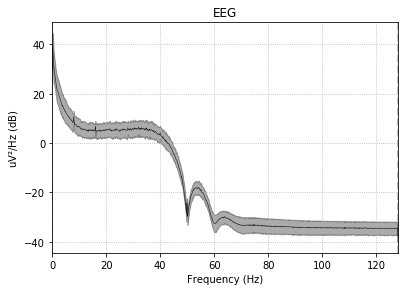

In [7]:
fig = raw_temp.plot_psd(tmax=np.inf, fmax=250, average=True)#tmax=np.inf,

In [9]:
# 1Hz high pass is often helpful for fitting ICA
band = raw_temp.filter(1., 50.)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 sec)



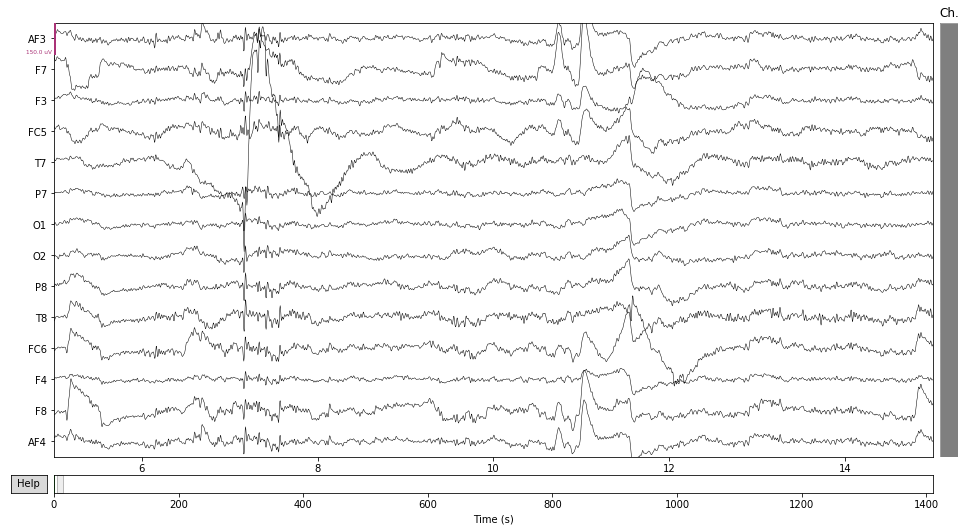

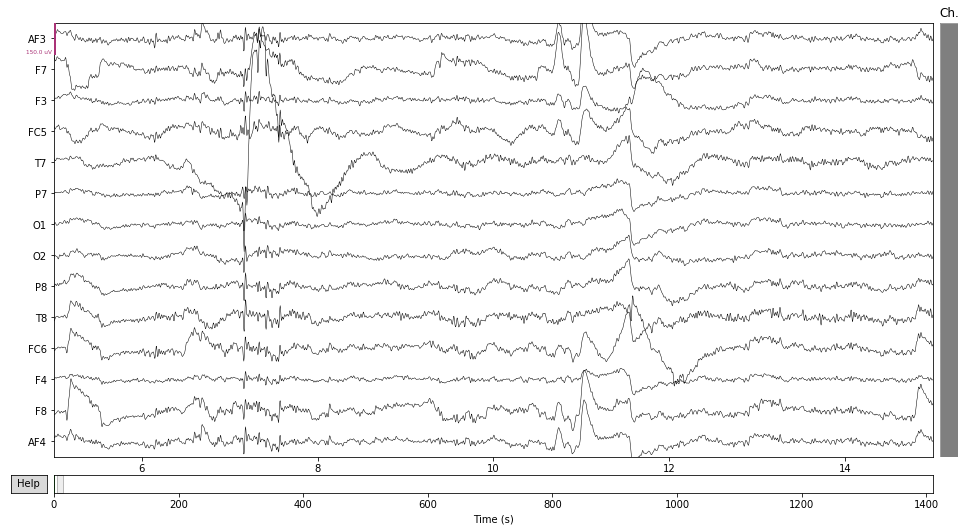

In [10]:
band.plot(start=5., duration=10,scalings={"eeg": 75e-6})

Effective window size : 8.000 (s)


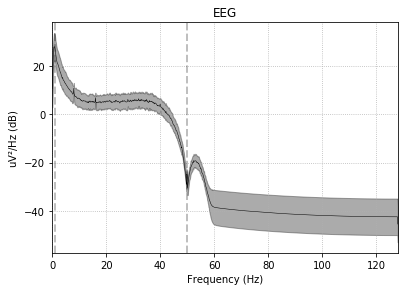

In [11]:
fig = band.plot_psd(fmax=250, average=True)

In [ ]:
filter_params = mne.filter.create_filter(raw_temp.get_data(), raw.info['sfreq'],
                                         l_freq=1., h_freq=50)


In [ ]:
mne.viz.plot_filter(filter_params, band.info['sfreq'], flim=(0.01, 5))

In [12]:
raw_notch = band.notch_filter(freqs=50.)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 sec)



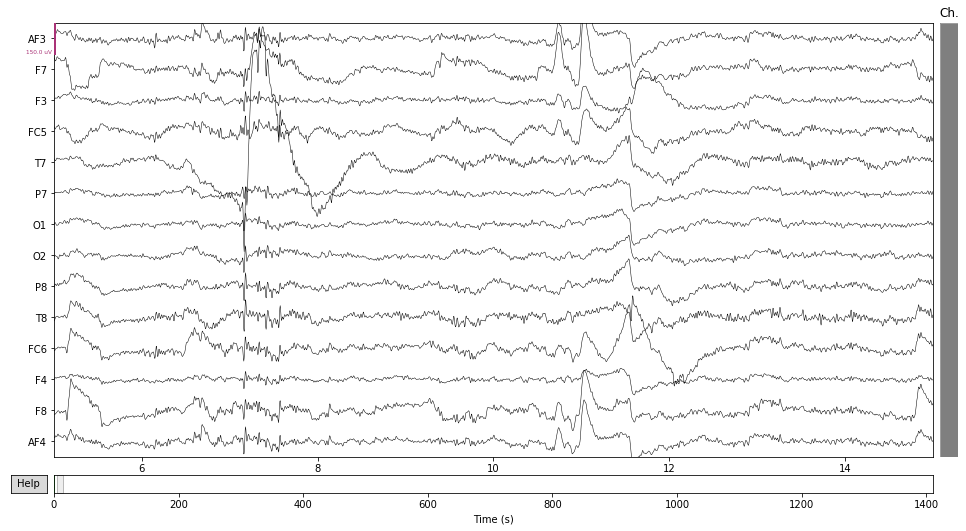

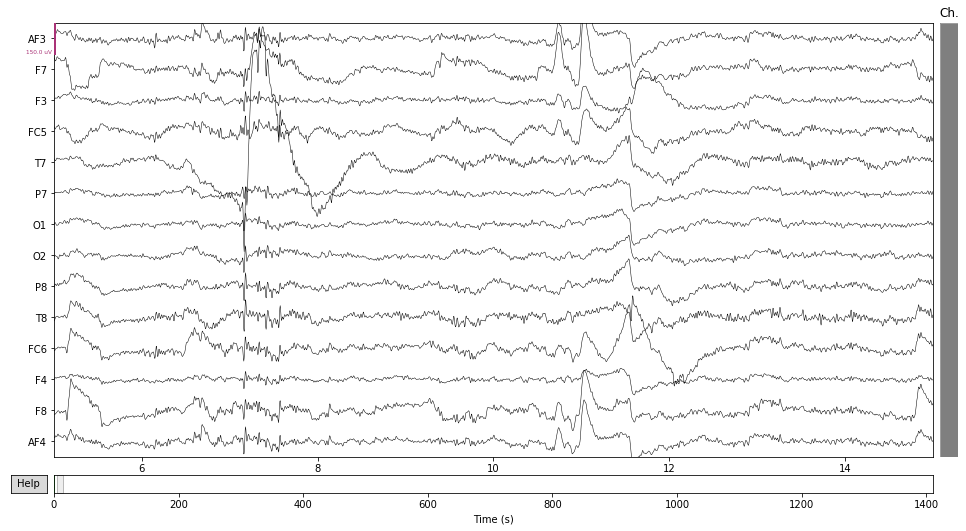

In [13]:
raw_notch.plot(start=5., duration=10,scalings={"eeg": 75e-6})

Effective window size : 8.000 (s)


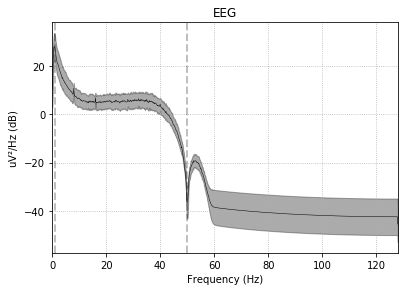

In [14]:
fig = raw_notch.plot_psd(fmax=250, average=True)

In [16]:
# set montage on filtered channel and plot it
montage = mne.channels.read_montage("standard_1020")
raw_temp.set_montage(montage)
#montage.plot()

C:\Users\user\Anaconda3\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-16-9b3888585346>:3: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_dig_polhemu

<RawEDF  |  19122019_1_2019.12.19_09.41.07.edf, n_channels x n_times : 14 x 361216 (1411.0 sec), ~38.6 MB, data loaded>

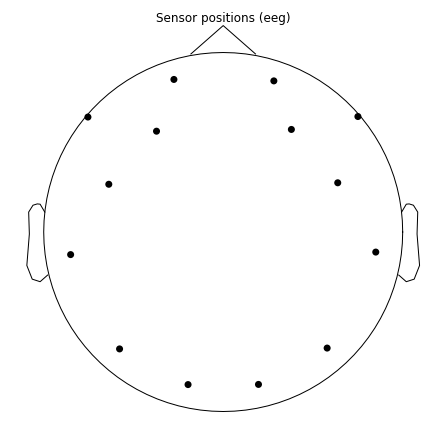

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# check the sensors positions
fig = raw_temp.plot_sensors()
fig.show()

In [18]:
from mne.preprocessing import ICA
n_components =2 # if float, select n_components by explained variance of PCA

#set components equal to number of channels

method = 'picard'   # for comparison with EEGLAB try "extended-infomax" here
decim = 3  # we need sufficient statistics, not all time points -> saves time

# we will also set state of the random number generator - ICA is a
# non-deterministic algorithm, but we want to have the same decomposition
# and the same order of components each time this tutorial is run
random_state = 100

ica = ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

<ICA  |  no decomposition, fit (picard):  samples, no dimension reduction>


In [19]:
# fit ICA 
reject = dict(eeg=400e-6)#dict(mag=5e-12, grad=5000e-13)

ica.fit(raw_notch, picks='eeg', decim=decim,reject=reject)
print(ica)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
    Rejecting  epoch based on EEG : ['T7']
Artifact detected in [513, 684]
    Rejecting  epoch based on EEG : ['F7', 'T7']
Artifact detected in [4275, 4446]
    Rejecting  epoch based on EEG : ['T7']
Artifact detected in [4446, 4617]
    Rejecting  epoch based on EEG : ['F7']
Artifact detected in [9405, 9576]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [10089, 10260]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [15732, 15903]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [15903, 16074]
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'T8', 'FC6', 'F8', 'AF4']
Artifact detected in [16245, 16416]
    Rejecting  epoch based on EEG : ['O2']
Artifact detected in [19152, 19323]
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'F8']
Artifact detected in [21717, 21888]
    Rejecting  epoch based on EEG :

Artifact detected in [94905, 95076]
    Rejecting  epoch based on EEG : ['F7']
Artifact detected in [96444, 96615]
    Rejecting  epoch based on EEG : ['AF3', 'F7']
Artifact detected in [100377, 100548]
    Rejecting  epoch based on EEG : ['FC5', 'T7']
Artifact detected in [102087, 102258]
    Rejecting  epoch based on EEG : ['FC5']
Artifact detected in [102258, 102429]
    Rejecting  epoch based on EEG : ['F4', 'F8']
Artifact detected in [106191, 106362]
    Rejecting  epoch based on EEG : ['AF4']
Artifact detected in [106362, 106533]
    Rejecting  epoch based on EEG : ['F7', 'F8']
Artifact detected in [107046, 107217]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [110124, 110295]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [110466, 110637]
    Rejecting  epoch based on EEG : ['F7', 'F8']
Artifact detected in [115425, 115596]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [115596, 115767]
    Rejecting  epoch based on EEG : ['F8'

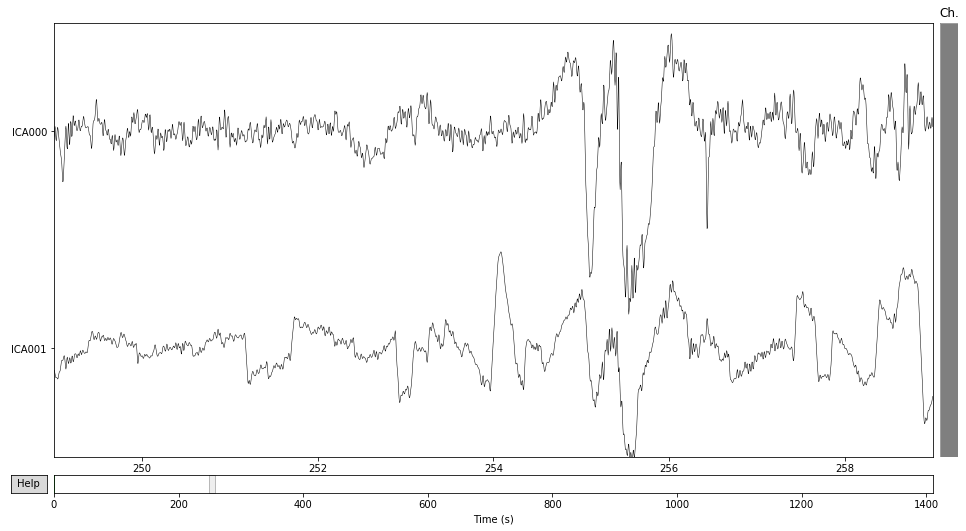

In [20]:
fig=ica.plot_sources(raw_notch,start=249,stop=259)

In [21]:
ica.detect_artifacts(raw_notch)

    Searching for artifacts...
    found 1 artifact by skewness
    found 1 artifact by kurtosis
    found 1 artifact by variance
Artifact indices found:
    0, 0, 1
    Removing duplicate indices...
Ready.


<ICA  |  raw data decomposition, fit (picard): 102258 samples, 2 components, channels used: "eeg", 2 sources marked for exclusion>

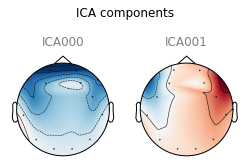

[<Figure size 259.2x180 with 2 Axes>]

In [22]:
ica.plot_components()

    Rejecting  epoch based on EEG : ['T7']
Artifact detected in [1536, 2048]
    Rejecting  epoch based on EEG : ['F7', 'T7']
Artifact detected in [12800, 13312]
    Rejecting  epoch based on EEG : ['T7']
Artifact detected in [13312, 13824]
    Rejecting  epoch based on EEG : ['F7']
Artifact detected in [28160, 28672]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [30720, 31232]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [47104, 47616]
    Rejecting  epoch based on EEG : ['F8']
Artifact detected in [48128, 48640]
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'T8', 'FC6', 'F8', 'AF4']
Artifact detected in [48640, 49152]
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'F8']
Artifact detected in [65024, 65536]
    Rejecting  epoch based on EEG : ['T7']
Artifact detected in [65536, 66048]
    Rejecting  epoch based on EEG : ['F7', 'F8']
Artifact detected in [66048, 66560]
    Rejecting  epoch based on EEG : ['F4']
Artifact detected in

    Rejecting  epoch based on EEG : ['AF3']
Artifact detected in [252416, 252928]
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
Artifact detected in [261120, 261632]
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'FC6', 'F8', 'AF4']
Artifact detected in [261632, 262144]
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'FC6', 'F8', 'AF4']
Artifact detected in [262144, 262656]
    Rejecting  epoch based on EEG : ['AF3', 'FC6']
Artifact detected in [283648, 284160]
    Rejecting  epoch based on EEG : ['AF3', 'FC6']
Artifact detected in [284160, 284672]
    Rejecting  epoch based on EEG : ['AF3', 'FC6', 'F8']
Artifact detected in [284672, 285184]
    Rejecting  epoch based on EEG : ['F7']
Artifact detected in [289280, 289792]
    Rejecting  epoch based on EEG : ['AF3', 'F7']
Artifact detected in [301056, 301568]
    Rejecting  epoch based on EEG : ['FC5', 'T7']
Artifact detected in [306688, 307200]
    Rejecting  epoch based on EEG : ['F4', 'F8']
Artifact detected in 

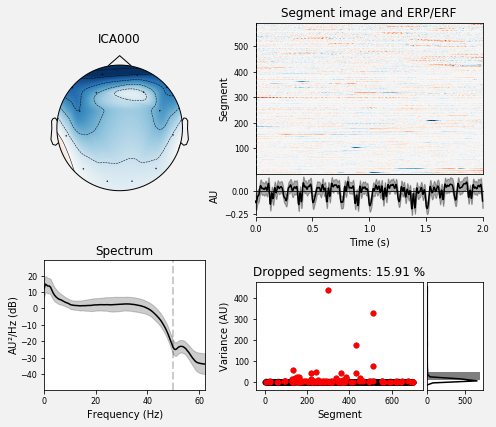

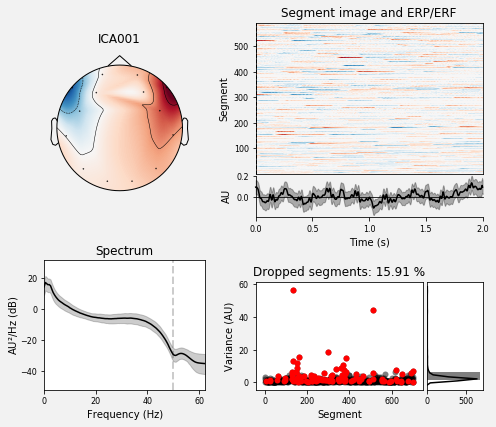

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [24]:
ica.plot_properties(raw_notch, picks=range(0,2))

In [25]:
reconst_raw = raw_notch.copy()# copy the previous data
Apply=ica.apply(reconst_raw) #apply the ICA 

Transforming to ICA space (2 components)
Zeroing out 2 ICA components


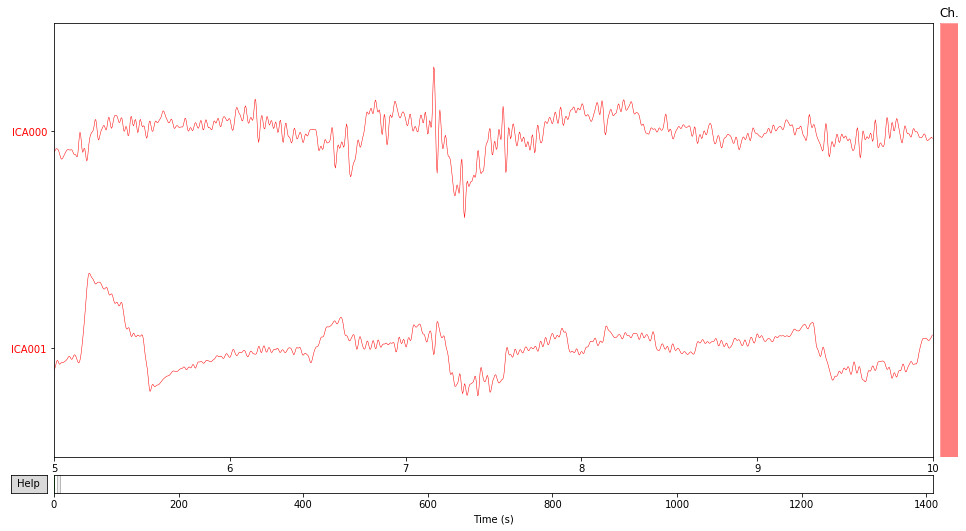

In [26]:
fig=ica.plot_sources(raw_notch,start=5,stop=10,title='ICA source from 600s')#,start=807,stop=817,

In [ ]:
picks=raw_temp.info['ch_names'][:13]
print(picks)
#ica.plot_properties(raw_temp,picks=picks)

In [ ]:
#select some forntal channel for analysis
chs_13 = ['Fz','Cz','Fp1','T7','Pz','Fp2','Oz','F8','T8','P4','O1','O2','FC5','C3','CP2']
chan_idxs = [raw_temp.ch_names.index(ch) for ch in chs_13]

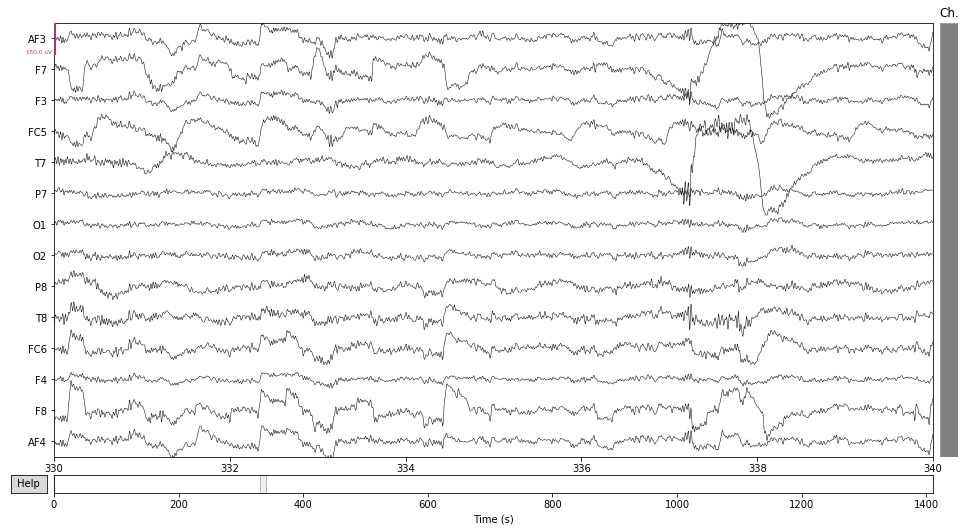

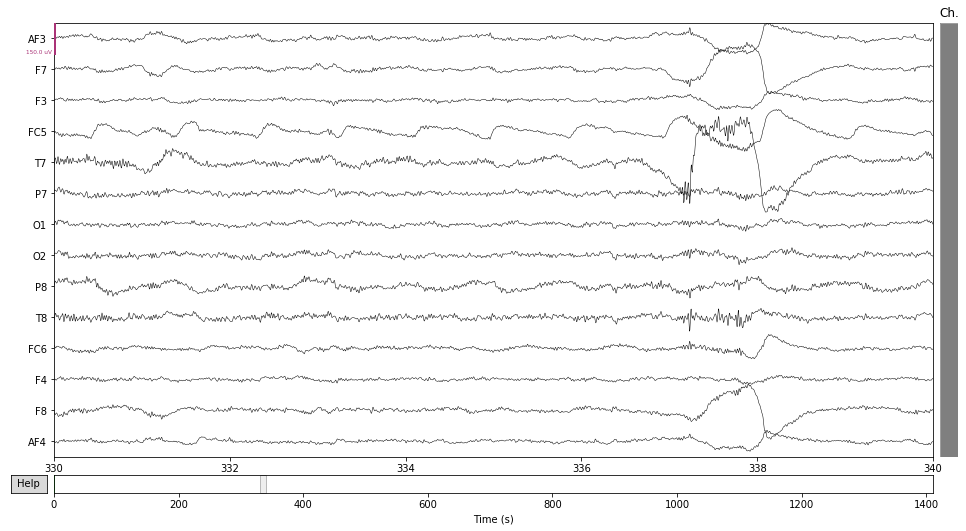

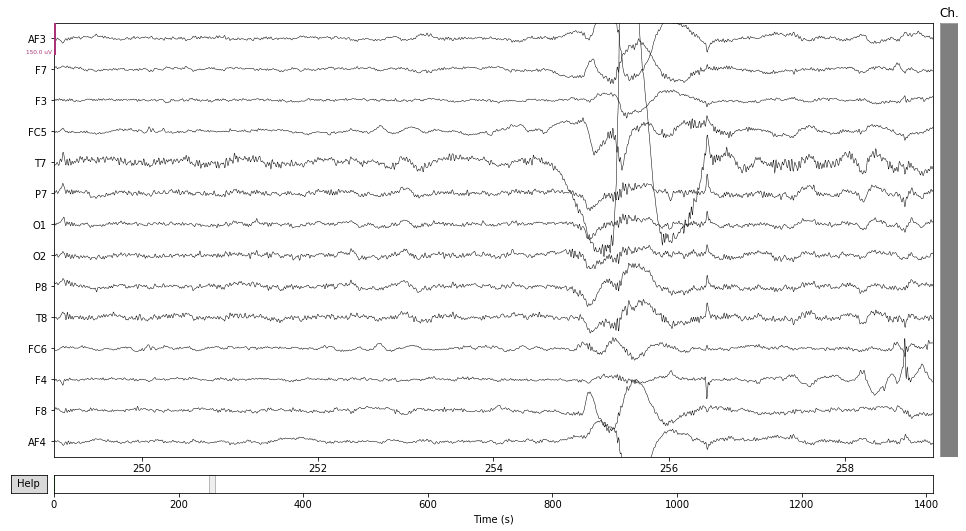

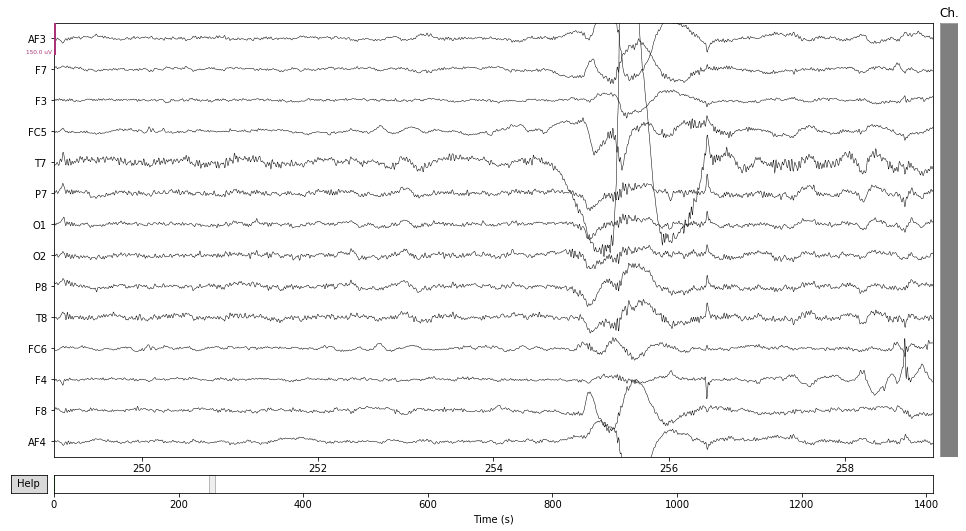

In [27]:
raw_temp.plot(start=330, duration=10,scalings={"eeg": 75e-6})
Apply.plot(start=330, duration=10,scalings={"eeg": 75e-6})
Apply.plot(start=249,duration=10,scalings={"eeg": 75e-6})

In [ ]:
fig=mne.viz.plot_raw(band,start=1, duration=10,scalings={"eeg": 75e-6},title= 'before')

Setting up band-pass filter from 1 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 50.00 Hz: -6.02, -6.02 dB



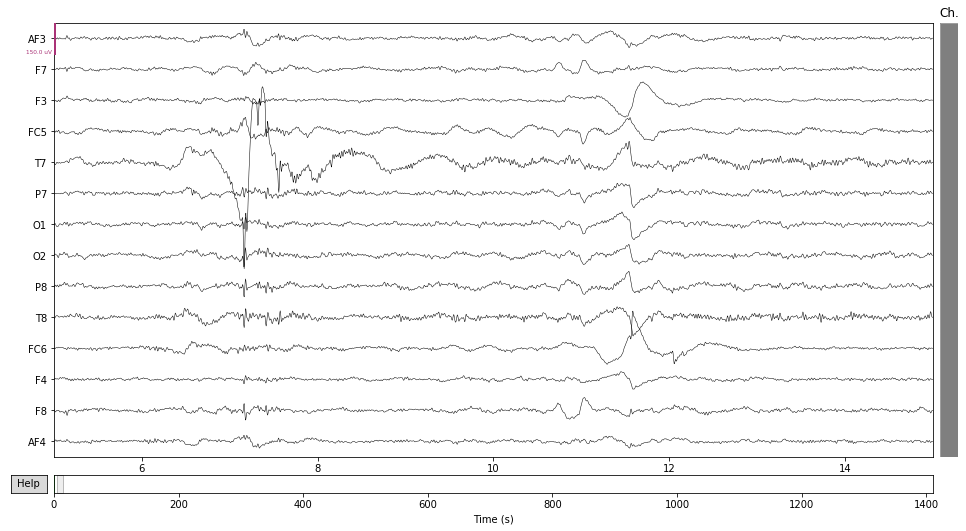

In [28]:
fig=mne.viz.plot_raw(Apply,start=5, duration=10,scalings={"eeg": 75e-6},title= 'before', highpass=1., lowpass=50., filtorder=4)

Effective window size : 8.000 (s)


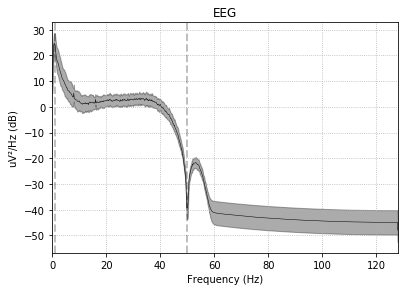

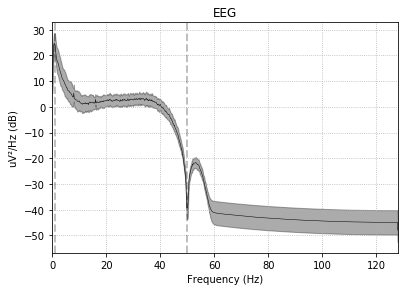

In [29]:
Apply.plot_psd(tmax=np.inf, fmax=250, average=True)#([1,4,5,6])#picks=range(1,12),

In [ ]:
band_1 = Apply.filter(1., 55.)

In [ ]:
raw_not = Apply.notch_filter(freqs=50.)

In [ ]:
band_1.plot_psd(tmax=np.inf, fmax=250,average=True)

In [ ]:
raw_not.plot_psd(tmax=np.inf, fmax=250,average=True)

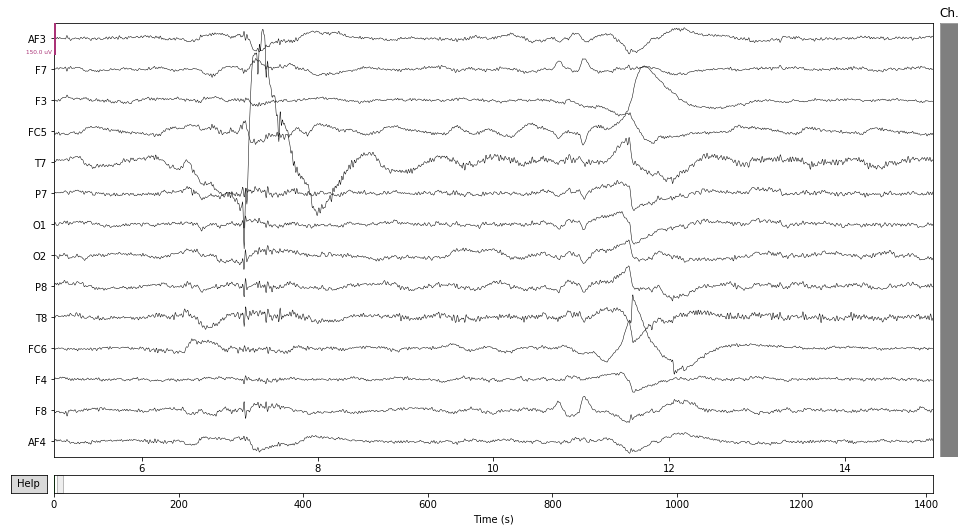

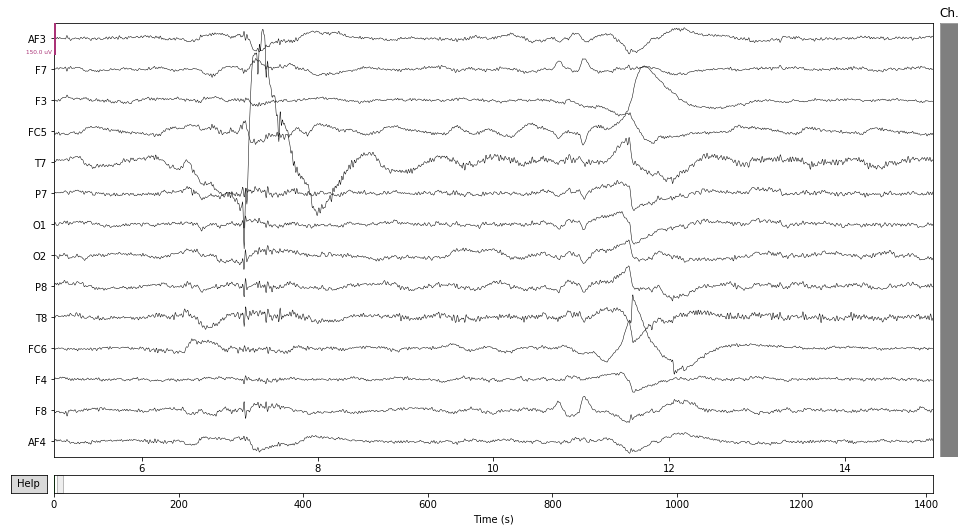

In [30]:
Apply.plot(start=5, duration=10,scalings={"eeg": 75e-6})

In [ ]:
raw_temp.plot(start=5, duration=10,scalings={"eeg": 75e-6})

In [ ]:
Apply.plot_psd(tmax=np.inf, fmax=250,picks='eeg',average=True)#([1,4,5,6])

In [32]:
# uncomment this for reading and writing
#Apply.save('C:/Users/user/Desktop/03062019 1.edf')
Apply.save(r'C:\Users\user\Desktop\Winter data\Winter ICA\19122019_2.fif')
#raw.annotations.save('C:/Users/user/Desktop/03062019 11.csv')

Writing C:\Users\user\Desktop\Winter data\Winter ICA\19122019_2.fif


<ipython-input-32-f8127b32637e>:3: RuntimeWarning: This filename (C:\Users\user\Desktop\Winter data\Winter ICA\19122019_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  Apply.save(r'C:\Users\user\Desktop\Winter data\Winter ICA\19122019_2.fif')


Closing C:\Users\user\Desktop\Winter data\Winter ICA\19122019_2.fif [done]


In [ ]:
#Apply.plot_image(picks=['Fp1', 'Fp2'])

In [ ]:
#ica.detect_artifacts(raw_temp)

In [ ]:
#reconst_raw=raw_temp.copy()

In [ ]:
#apply=ica.apply(reconst_raw)
#apply.plot(start=979,duration=4)

In [ ]:
#raw_temp.plot(start=979,duration=4)

In [ ]:
# uncomment this for reading and writing
#Apply.save('C:/Users/user/Desktop//22052019_1_ica.edf')


In [ ]:
#from mne.preprocessing import read_ica
#read= read_ica('C:/Users/user/Desktop/doc snc/my-ica.fif')

In [ ]:
import pandas as pd

In [ ]:
path = r'C:/Users/user/Desktop/03062019 11.csv'
df = pd.read_csv(path)

In [ ]:
df